<br> <center> <font size="15" color=Gray> EDA on the Weather Station Data - Alex Berg & Vehid Sumic </font> </center> <br/>

# Importing Libraries

In [1]:
import os
import glob
import warnings
import pandas as pd
import seaborn as sb
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

<br>
<br> <center> <font size="9" color=Brown>Weather station Dataset</font> </center> <br/>

# Reading Weatherstation Dataset

In [2]:
#Read the json file and append it to a dataframe
df_weatherstation = pd.read_json('ws.json')
df_weatherstation.head(5)

,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature
0,2018-09-01 00:00:00,0.0,95.6,0.0,599.2,1016.3,16.1
1,2018-09-01 00:05:00,0.1,NaN,NaN,NaN,NaN,NaN
2,2018-09-01 00:10:00,0.0,95.5,0.0,600.0,1016.4,16.1
3,2018-09-01 00:15:00,0.0,NaN,NaN,NaN,NaN,NaN
4,2018-09-01 00:20:00,0.0,95.2,0.0,598.9,1016.5,16.1


# Shape of the Dataset

In [3]:
df_weatherstation.shape

(26175, 7)

# Null values in the Weather Station dataset

In [4]:
df_weatherstation.isnull().sum(axis = 0)

timestamp            0
precipitation       13
humidity         13090
radiation        13090
sunshine         13092
pressure         13090
temperature      13116
dtype: int64

<br>
<br> <center> <font size="9" color=Brown>Wind Dataset</font> </center> <br/>

# Reading Wind Dataset

In [5]:
#Searches for all the csv files in the directory then we will concatenate the 3 files into one dataframe
path = os.getcwd()
all_files = glob.glob(path + "/*.csv") 
#Create empty list
li = []
#Loop through the diretory 
for filename in all_files:
    # reading each dataset into a dataframe
    df = pd.read_csv(filename)
    # appending dataset into the a list
    li.append(df)
# concatinating list into the dataframe
df_wind = pd.concat(li, axis=0, ignore_index=True)
# top 5 rows of the dataset
df_wind.head(5)

,timestamp,wind_speed,wind_direction
0,2018-10-01 00:00:00,3.277333,307.446667
1,2018-10-01 00:15:00,3.657733,292.816667
2,2018-10-01 00:30:00,3.689933,307.526667
3,2018-10-01 00:45:00,3.357267,310.600000
4,2018-10-01 01:00:00,3.362133,314.113333


# Shape of the Wind dataset

In [6]:
df_wind.shape

(8736, 3)

<br>
<br> <center> <font size="9" color=Brown>Data Manipulation</font> </center> <br/>

# Mean per 15 Minutes of the Weatherstation Dataset

### if you look at the dataset of wind, it contains the values after each 15 minutes.
### we have to combine wind and weatherstation data
### so we have to change the weatherstation data into the same format so that we can merge them both
### for that we have taken the mean per 15 minutes of the weatherstation dataset

In [7]:
# means per 15 minutes
df_weatherstation_mean = df_weatherstation.groupby(pd.Grouper(key='timestamp',freq='15min')).mean()
# reset the index
df_weatherstation_mean = df_weatherstation_mean.reset_index(drop = False)
# top 5 rows of the dataset
df_weatherstation_mean.head(5)

,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature
0,2018-09-01 00:00:00,0.033333,95.55,0.0,599.6,1016.35,16.10
1,2018-09-01 00:15:00,0.000000,95.20,0.0,598.9,1016.50,16.10
2,2018-09-01 00:30:00,0.000000,95.20,0.0,600.0,1016.35,16.10
3,2018-09-01 00:45:00,0.000000,95.00,0.0,598.5,1016.10,16.00
4,2018-09-01 01:00:00,0.000000,94.90,0.0,599.5,1016.05,15.95


# Merging both Datasets

In [8]:
# changing the timestamp format into pandas datatime
df_weatherstation_mean['timestamp'] = pd.to_datetime(df_weatherstation_mean['timestamp'],infer_datetime_format=True)
# changing the timestamp format into pandas datatime
df_wind['timestamp'] = pd.to_datetime(df_wind['timestamp'],infer_datetime_format=True)
# merging both datasets on the base of the timestamp
WeatherStationData = pd.merge(df_weatherstation_mean,df_wind,on = 'timestamp',how='left')
# top 5 rows
WeatherStationData.head(5)

,timestamp,precipitation,humidity,radiation,sunshine,pressure,temperature,wind_speed,wind_direction
0,2018-09-01 00:00:00,0.033333,95.55,0.0,599.6,1016.35,16.10,4.443333,68.685333
1,2018-09-01 00:15:00,0.000000,95.20,0.0,598.9,1016.50,16.10,4.122467,71.740667
2,2018-09-01 00:30:00,0.000000,95.20,0.0,600.0,1016.35,16.10,3.427533,67.434667
3,2018-09-01 00:45:00,0.000000,95.00,0.0,598.5,1016.10,16.00,3.437867,68.142667
4,2018-09-01 01:00:00,0.000000,94.90,0.0,599.5,1016.05,15.95,3.688533,69.695333


<br>
<br> <center> <font size="9" color=Brown>Exploratory Data Dnalysis (EDA)</font> </center> <br/>

# Data Distribuation of all Numeric Columns

**********************************************************************
Data Distribuation of all Numeric Columns to See the Outliers
**********************************************************************


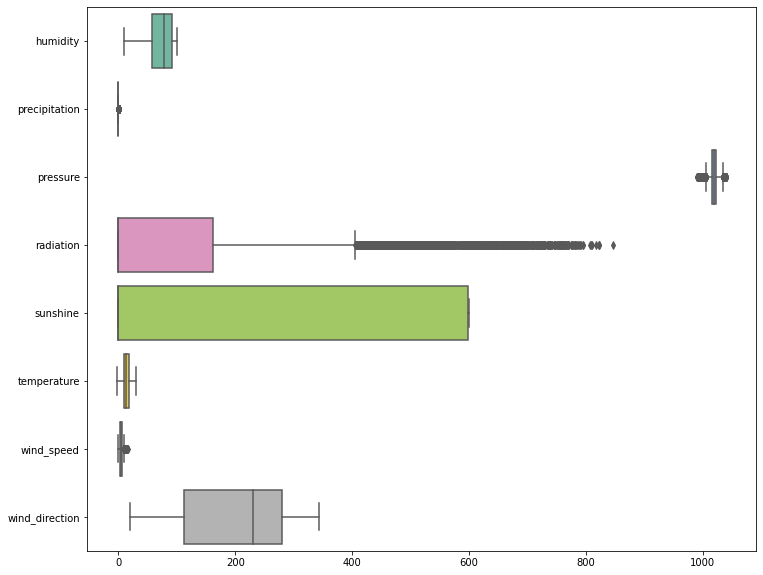

In [9]:
print("*"*70)
print("Data Distribuation of all Numeric Columns to See the Outliers")
print("*"*70)
rcParams['figure.figsize'] = 12, 10
WeatherStationData_short = WeatherStationData[["humidity","precipitation","pressure","radiation","sunshine","temperature","wind_speed","wind_direction"]]
ax = sns.boxplot(data=WeatherStationData_short, orient="h", palette="Set2")

# Data Distribuation Per Month

### Some Attributes contains very small values, so to see their effect we have divided data into three dataset so that we can see the effect easily

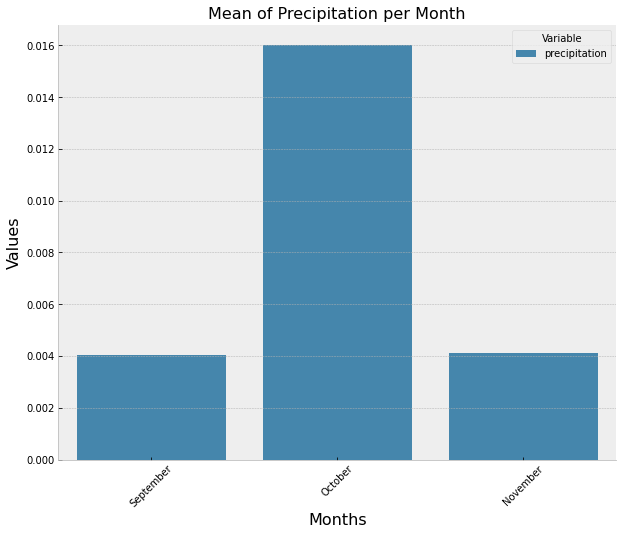

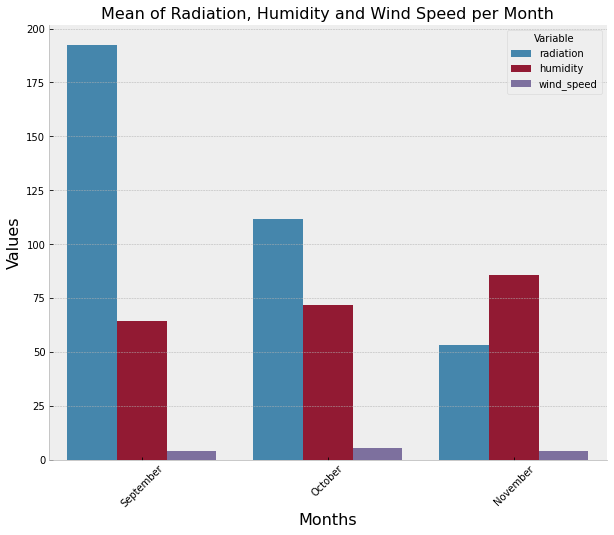

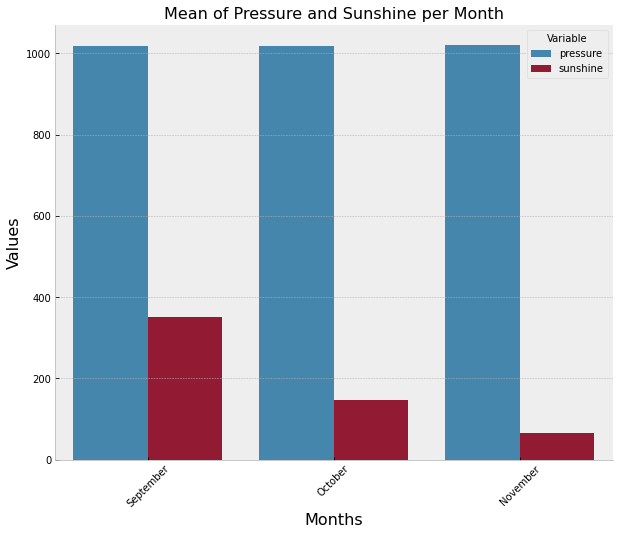

In [10]:
# making small datasets
data_1 = WeatherStationData[['timestamp','precipitation']]
data_2 = WeatherStationData[['timestamp','radiation','humidity','wind_speed']]
data_3 = WeatherStationData[['timestamp','pressure','sunshine']]
# getting month name from timestamp
data_1['Month'] = pd.to_datetime(data_1['timestamp']).dt.month_name()
# getting month number from timestamp
data_1['Month_num'] = pd.DatetimeIndex(data_1['timestamp']).month
# sort by month number
data_1 = data_1.sort_values(by = 'Month_num')
# reset index
data_1 = data_1.reset_index(drop = True)
# mean per month into new dataframe
data_1_per_mon = data_1.groupby('Month', sort=False).mean()
data_1_per_mon = data_1_per_mon.reset_index(drop = False)
# deleting month number column
del data_1_per_mon['Month_num']
# melting dataframe into another dataframe
test123 = data_1_per_mon.melt(id_vars='Month').rename(columns=str.title)
# plot
plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.barplot(x='Month', y='Value', hue='Variable', data=test123, ax=ax1)
sns.despine(fig)
plt.xticks(rotation=45)
plt.xlabel('Months',fontsize=16)
plt.ylabel('Values',fontsize=16)
plt.title("Mean of Precipitation per Month",fontsize=16)
plt.show()

data_2['Month'] = pd.to_datetime(data_2['timestamp']).dt.month_name()
data_2['Month_num'] = pd.DatetimeIndex(data_2['timestamp']).month
data_2 = data_2.sort_values(by = 'Month_num')
data_2 = data_2.reset_index(drop = True)
data_2_per_mon = data_2.groupby('Month', sort=False).mean()
data_2_per_mon = data_2_per_mon.reset_index(drop = False)
del data_2_per_mon['Month_num']
test123 = data_2_per_mon.melt(id_vars='Month').rename(columns=str.title)
plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.barplot(x='Month', y='Value', hue='Variable', data=test123, ax=ax1)
sns.despine(fig)
plt.xticks(rotation=45)
plt.xlabel('Months',fontsize=16)
plt.ylabel('Values',fontsize=16)
plt.title("Mean of Radiation, Humidity and Wind Speed per Month",fontsize=16)
plt.show()

data_3['Month'] = pd.to_datetime(data_3['timestamp']).dt.month_name()
data_3['Month_num'] = pd.DatetimeIndex(data_3['timestamp']).month
data_3 = data_3.sort_values(by = 'Month_num')
data_3 = data_3.reset_index(drop = True)
data_3_per_mon = data_3.groupby('Month', sort=False).mean()
data_3_per_mon = data_3_per_mon.reset_index(drop = False)
del data_3_per_mon['Month_num']
test123 = data_3_per_mon.melt(id_vars='Month').rename(columns=str.title)
plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.barplot(x='Month', y='Value', hue='Variable', data=test123, ax=ax1)
sns.despine(fig)
plt.xticks(rotation=45)
plt.xlabel('Months',fontsize=16)
plt.ylabel('Values',fontsize=16)
plt.title("Mean of Pressure and Sunshine per Month",fontsize=16)
plt.show()

# Data Distribuation Per Day

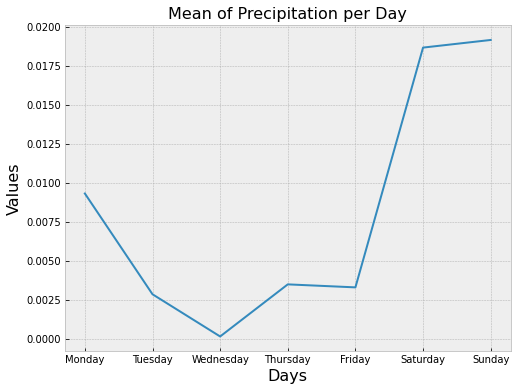

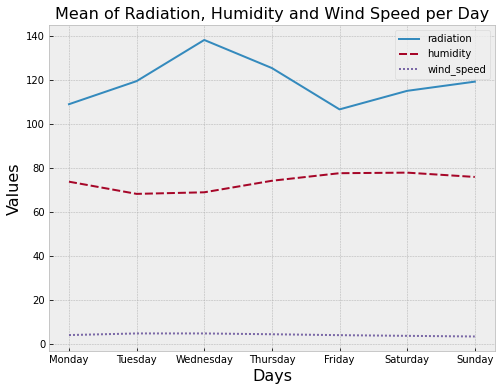

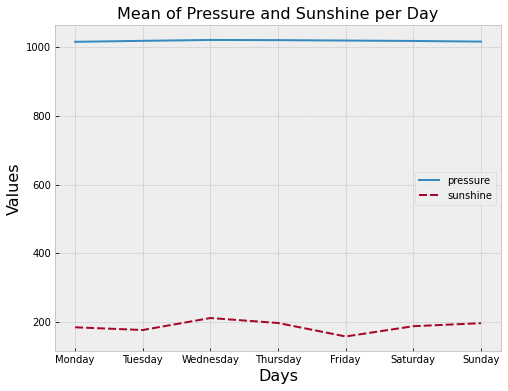

In [11]:
# making small datasets
data_1 = WeatherStationData[['timestamp','precipitation']]
data_2 = WeatherStationData[['timestamp','radiation','humidity','wind_speed']]
data_3 = WeatherStationData[['timestamp','pressure','sunshine']]
# getting day name from timestamp
data_1['Day'] = pd.to_datetime(data_1['timestamp']).dt.day_name()
# getting data number from timestamp column
data_1['Day_num'] = pd.to_datetime(data_1['timestamp']).dt.dayofweek
# sorting data by day number
data_1 = data_1.sort_values(by = 'Day_num')
data_1 = data_1.reset_index(drop = True)
# deleting the day number
del data_1['Day_num']
# mean per day
d = data_1.groupby('Day',sort = False).mean()
d = d.reset_index()
plt.xlabel('Days',fontsize=16)
plt.ylabel('Values',fontsize=16)
plt.title("Mean of Precipitation per Day",fontsize=16)
# lineplot 
sns.lineplot(data = d,x = "Day", y= "precipitation",sort=False)
plt.gcf().set_size_inches(8, 6)
plt.show()
data_2['Day'] = pd.to_datetime(data_2['timestamp']).dt.day_name()
data_2['Day_num'] = pd.to_datetime(data_2['timestamp']).dt.dayofweek
data_2 = data_2.sort_values(by = 'Day_num')
data_2 = data_2.reset_index(drop = True)
del data_2['Day_num']
plt.xlabel('Days',fontsize=16)
plt.ylabel('Values',fontsize=16)
plt.title("Mean of Radiation, Humidity and Wind Speed per Day",fontsize=16)
sns.lineplot(data = data_2.groupby('Day',sort = False).mean(),sort=False)
plt.gcf().set_size_inches(8, 6)
plt.show()
data_3['Day'] = pd.to_datetime(data_3['timestamp']).dt.day_name()
data_3['Day_num'] = pd.to_datetime(data_3['timestamp']).dt.dayofweek
data_3 = data_3.sort_values(by = 'Day_num')
data_3 = data_3.reset_index(drop = True)
del data_3['Day_num']
plt.xlabel('Days',fontsize=16)
plt.ylabel('Values',fontsize=16)
plt.title("Mean of Pressure and Sunshine per Day",fontsize=16)
sns.lineplot(data = data_3.groupby('Day',sort = False).mean(),sort=False)
plt.gcf().set_size_inches(8, 6)
plt.show()

# Data Distribuation Per Hour

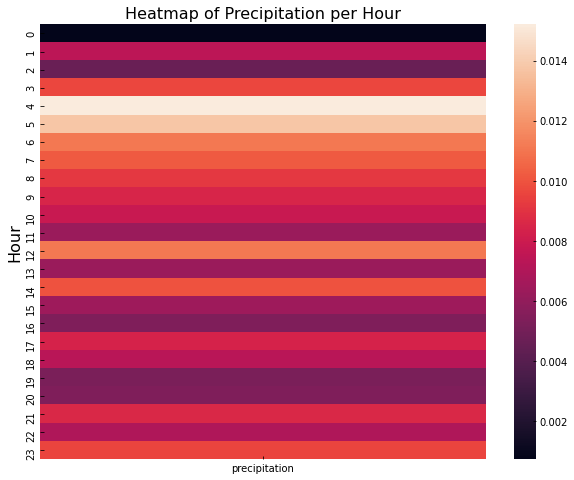

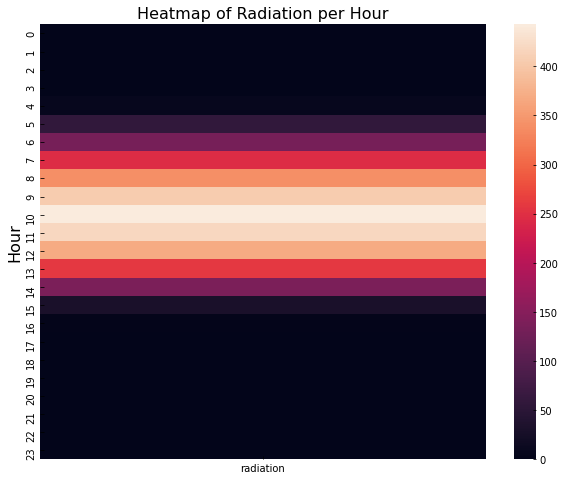

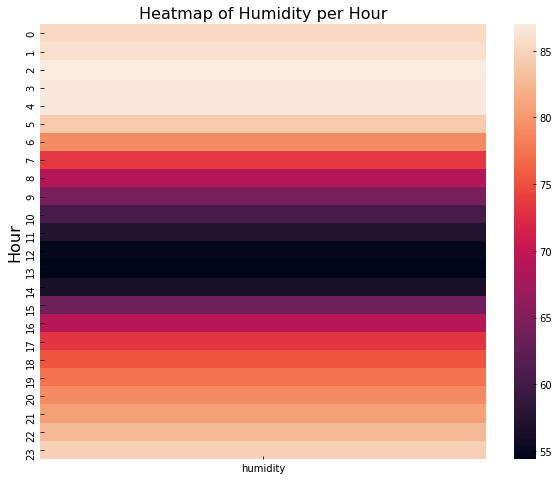

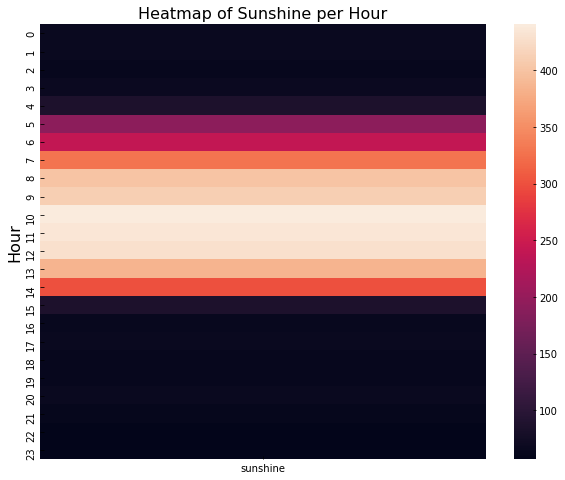

In [12]:
# getting hour from the timestamp
data_1['Hour'] = pd.DatetimeIndex(data_1['timestamp']).hour
# pivoting dataframe by hours
p = pd.pivot_table(data_1, values='precipitation', index=['Hour'])
plt.figure(figsize=(10,8))
plt.xlabel('City',fontsize=16)
plt.ylabel('Precipitation',fontsize=16)
plt.title("Heatmap of Precipitation per Hour",fontsize=16)
# heat map of Precipitation per hour
ax = sns.heatmap(p)
plt.show()

data_2 = WeatherStationData[['timestamp','radiation']]
data_2['Hour'] = pd.DatetimeIndex(data_2['timestamp']).hour
p = pd.pivot_table(data_2, values='radiation', index=['Hour'])
plt.figure(figsize=(10,8))
plt.xlabel('Radiation',fontsize=16)
plt.ylabel('Hour',fontsize=16)
plt.title("Heatmap of Radiation per Hour",fontsize=16)
# heat map of Radiation per hour
ax = sns.heatmap(p)
plt.show()


data_2 = WeatherStationData[['timestamp','humidity']]
data_2['Hour'] = pd.DatetimeIndex(data_2['timestamp']).hour
p = pd.pivot_table(data_2, values='humidity', index=['Hour'])
plt.figure(figsize=(10,8))
plt.xlabel('Humidity',fontsize=16)
plt.ylabel('Hour',fontsize=16)
plt.title("Heatmap of Humidity per Hour",fontsize=16)
# heat map of Humidity per hour
ax = sns.heatmap(p)
plt.show()

data_2 = WeatherStationData[['timestamp','sunshine']]
data_2['Hour'] = pd.DatetimeIndex(data_2['timestamp']).hour
p = pd.pivot_table(data_2, values='sunshine', index=['Hour'])
plt.figure(figsize=(10,8))
plt.xlabel('Sunshine',fontsize=16)
plt.ylabel('Hour',fontsize=16)
plt.title("Heatmap of Sunshine per Hour",fontsize=16)
# heat map of Sunshine per hour
ax = sns.heatmap(p)
plt.show()

<br>
<br> <center> <font size="9" color=Brown>Conclusions</font> </center> <br/>

 - ### Radiation contains outliers.
 - ### In October the value of Precipitation is highest.
 - ### In September Radiation is highest, in October Wind Speed is high and in November the Humidity is highest.
 - ### In September the Sunshine is high.
 - ### Precipitation is high on Saturday and Sunday.
 - ### Radiation is high on Wednesday and on Friday and Saturday Humidity is high.
 - ### Precipitation is high on 4AM to 5AM.
 - ### Radiation is high on 8AM to 12PM.
 - ### Humidity is high on 12AM to 5AM and 9PM to 11PM.
 - ### From 8AM to 1PM the Sunshine is high.